In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Step 1: Load and save the dataset to simulate CSV loading
iris_data = load_iris()
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

# Save to CSV (simulating an external CSV source)
df.to_csv('iris.csv', index=False)

# Step 2: Load dataset from CSV with error handling
try:
    iris_df = pd.read_csv('iris.csv')
    print("Dataset Loaded Successfully")
    print(iris_df.head())  # Display first few rows
except FileNotFoundError:
    print("Error: CSV file not found.")

# Step 3: Check structure
print("\nDataset Info:")
print(iris_df.info())

# Step 4: Check and clean missing values
print("\nMissing Values:")
print(iris_df.isnull().sum())

# Clean missing values if any (here, no missing data but the code is ready)
iris_df = iris_df.dropna()


Dataset Loaded Successfully
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species      

In [43]:
# Step 1: Basic statistics
print("\nBasic Statistics:")
print(iris_df.describe())

# Step 2: Group by species and compute mean of numerical columns
grouped_means = iris_df.groupby('species').mean()
print("\nMean Measurements per Species:")
print(grouped_means)

# Step 3: Patterns/Insights
print("\nInsights:")
print("- Setosa has the smallest petal sizes.")
print("- Virginica has the largest petal and sepal sizes.")



Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Mean Measurements per Species:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                    

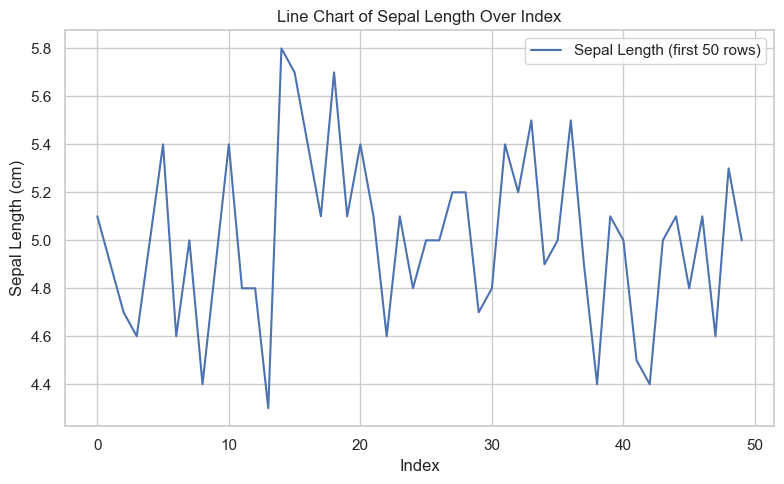

C:\Users\ErickOndiwa\AppData\Local\Temp\ipykernel_9500\2768772175.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=iris_df, x='species', y='petal length (cm)', ci=None)


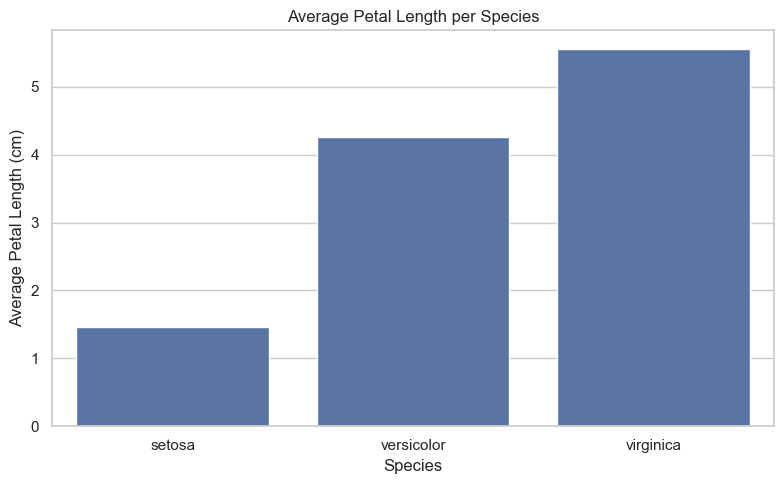

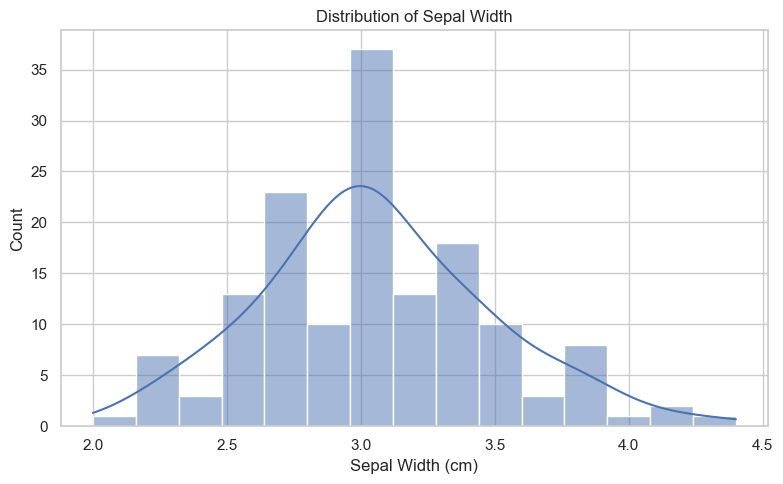

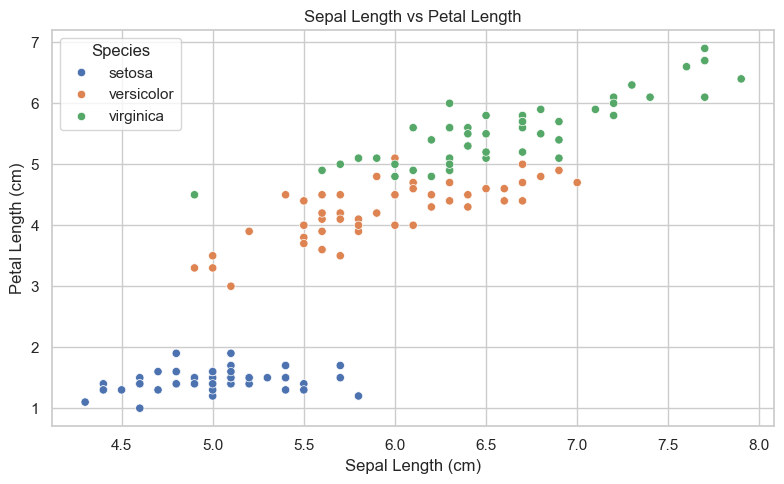

In [45]:
sns.set(style="whitegrid")

# 1. Line Chart (not ideal for Iris, but we simulate a trend over index)
plt.figure(figsize=(8, 5))
plt.plot(iris_df.index[:50], iris_df['sepal length (cm)'][:50], label='Sepal Length (first 50 rows)')
plt.title('Line Chart of Sepal Length Over Index')
plt.xlabel('Index')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Bar Chart: Average petal length per species
plt.figure(figsize=(8, 5))
sns.barplot(data=iris_df, x='species', y='petal length (cm)', ci=None)
plt.title('Average Petal Length per Species')
plt.xlabel('Species')
plt.ylabel('Average Petal Length (cm)')
plt.tight_layout()
plt.show()

# 3. Histogram: Distribution of Sepal Width
plt.figure(figsize=(8, 5))
sns.histplot(iris_df['sepal width (cm)'], bins=15, kde=True)
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 4. Scatter Plot: Sepal Length vs Petal Length
plt.figure(figsize=(8, 5))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='petal length (cm)', hue='species')
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.tight_layout()
plt.show()
